In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

### Loading the data:

In [3]:
churn_data = pd.read_csv('churn_prediction.csv')
churn_data

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


### Exploratory Data Analysis (EDA):

### Data pre-processing:

In [4]:
# Checking for Missing values:
display(churn_data.isna().sum())

# Getting the column names which contain missing values:
missing_val_cols = list(churn_data.isna().sum().loc[lambda x: x>0].index)


customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [5]:
## Gender column before pre-processing:
print('# Before preprocessing:')
# Percentage of missing values in the Gender column:
print('Percentage of missing values: {}%'.format(round((churn_data['gender'].isna().sum()/churn_data.shape[0]) * 100, 2)))
# Data type of the Gender column:
print('Data type:',churn_data['gender'].dtype)
# categories and their percentages in the gender column:
print(churn_data['gender'].value_counts()/churn_data['gender'].shape[0] * 100)

## Pre-processing of Gender column:
# Imputing the missing values using Mode of the column:
churn_data['gender'].fillna(churn_data['gender'].mode()[0], inplace=True)

## Gender column after pre-processing:
print('\t')
print('--------------------------------')
print('# After preprocessing:')
# Percentage of missing values in the Gender column:
print('Percentage of missing values: {}%'.format(round((churn_data['gender'].isna().sum()/churn_data.shape[0]) * 100, 2)))
# Data type of the Gender column:
print('Data type:',churn_data['gender'].dtype)
# categories and their percentages in the gender column:
print(churn_data['gender'].value_counts()/churn_data['gender'].shape[0] * 100)

# Before preprocessing:
Percentage of missing values: 1.85%
Data type: object
Male      58.304559
Female    39.845677
Name: gender, dtype: float64
	
--------------------------------
# After preprocessing:
Percentage of missing values: 0.0%
Data type: object
Male      60.154323
Female    39.845677
Name: gender, dtype: float64


In [6]:
## Dependents column before pre-processing:
# Percentage of missing values in the Dependents column:
print('Percentage of missing values: {}%'.format(round((churn_data['dependents'].isna().sum()/churn_data.shape[0]) * 100, 2)))
# Data type of the Gender column:
print('Data type:',churn_data['dependents'].dtype)
# Values in the dependents column:
print(churn_data['dependents'].value_counts()/churn_data['dependents'].shape[0] * 100) ## Based on the values it has we can say that 'Dependents' is a categorical column

## Pre-processing of Dependents column:
# Imputing the missing values using Mode of the column:
churn_data['dependents'].fillna(churn_data['dependents'].mode()[0], inplace=True)
# Converting the data type of the dependents colum:
churn_data['dependents'] = churn_data['dependents'].astype('int64')
# Replacing values greater then 2 with 3 as the all the values greater than 2 account upto very small percentage. So, they were grouped into one category which is 3. This is also a kind of Outlier handling
churn_data.loc[churn_data['dependents'] > 2, 'dependents'] = 3
# # Converting the integer values into categories:
# churn_data['dependents'] = churn_data['dependents'].astype('category')

## Dependents column after pre-processing:
print('\t')
print('--------------------------------')
print('# After preprocessing:')
# Percentage of missing values in the Dependents column:
print('Percentage of missing values: {}%'.format(round((churn_data['dependents'].isna().sum()/churn_data.shape[0]) * 100, 2)))
# Data type of the Gender column:
print('Data type:',churn_data['dependents'].dtype)
# Values in the dependents column:
print(churn_data['dependents'].value_counts()/churn_data['dependents'].shape[0] * 100) ## Based on the values it has we can say that 'Dependents' is a categorical column

Percentage of missing values: 8.68%
Data type: float64
0.0     75.523219
2.0      7.575224
1.0      4.915087
3.0      2.469875
4.0      0.630681
5.0      0.144458
6.0      0.028187
7.0      0.010570
9.0      0.003523
52.0     0.003523
36.0     0.003523
50.0     0.003523
8.0      0.003523
25.0     0.003523
32.0     0.003523
Name: dependents, dtype: float64
	
--------------------------------
# After preprocessing:
Percentage of missing values: 0.0%
Data type: int64
0    84.201254
2     7.575224
1     4.915087
3     3.308435
Name: dependents, dtype: float64


In [7]:
## occupation column before pre-processing:
# Percentage of missing values in the occupation column:
print('Percentage of missing values: {}%'.format(round((churn_data['occupation'].isna().sum()/churn_data.shape[0]) * 100, 2)))
# Data type of the occupation column:
print('Data type:',churn_data['occupation'].dtype)
# Values in the occupation column:
print(churn_data['occupation'].value_counts()/churn_data['occupation'].shape[0] * 100)

## Pre-processing of occupation column:
# Imputing the missing values using Mode of the column:
churn_data['occupation'].fillna(churn_data['occupation'].mode()[0], inplace=True)
# Converting the object values into categories:
churn_data['occupation'] = churn_data['occupation'].astype('category')

##  occupation column after pre-processing:
print('\t')
print('--------------------------------')
print('# After preprocessing:')
# Percentage of missing values in the occupation column:
print('Percentage of missing values: {}%'.format(round((churn_data['occupation'].isna().sum()/churn_data.shape[0]) * 100, 2)))
# Data type of the occupation column:
print('Data type:',churn_data['occupation'].dtype)
# Values in the occupation column:
print(churn_data['occupation'].value_counts()/churn_data['occupation'].shape[0] * 100) 

Percentage of missing values: 0.28%
Data type: object
self_employed    61.574237
salaried         23.620605
student           7.251075
retired           7.131280
company           0.140934
Name: occupation, dtype: float64
	
--------------------------------
# After preprocessing:
Percentage of missing values: 0.0%
Data type: category
self_employed    61.856106
salaried         23.620605
student           7.251075
retired           7.131280
company           0.140934
Name: occupation, dtype: float64


In [10]:
# churn_data['city'].nunique() #### City is a category as each value represents a unique code for that city

In [7]:
## city column before pre-processing:
# Percentage of missing values in the city column:
print('Percentage of missing values: {}%'.format(round((churn_data['city'].isna().sum()/churn_data.shape[0]) * 100, 2)))
# Data type of the city column:
print('Data type:',churn_data['city'].dtype)
# Values in the dependents column:
print(churn_data['city'].value_counts()/churn_data['city'].shape[0] * 100)

## Pre-processing of city column:
# Imputing the missing values using Mode of the column:
churn_data['city'].fillna(churn_data['city'].mode()[0], inplace=True)
# # Converting the object values into categories:
# churn_data['city'] = churn_data['city'].astype('category')

## city column after pre-processing:
print('\t')
print('--------------------------------')
print('# After preprocessing:')
# Percentage of missing values in the city column:
print('Percentage of missing values: {}%'.format(round((churn_data['city'].isna().sum()/churn_data.shape[0]) * 100, 2)))
# Data type of the city column:
print('Data type:',churn_data['city'].dtype)
# Values in the city column:
print(churn_data['city'].value_counts()/churn_data['city'].shape[0] * 100) 

Percentage of missing values: 2.83%
Data type: float64
1020.0    12.257769
1096.0     7.103094
409.0      4.700162
146.0      4.548658
834.0      4.009584
            ...    
748.0      0.003523
1099.0     0.003523
108.0      0.003523
655.0      0.003523
723.0      0.003523
Name: city, Length: 1604, dtype: float64
	
--------------------------------
# After preprocessing:
Percentage of missing values: 0.0%
Data type: float64
1020.0    15.087027
1096.0     7.103094
409.0      4.700162
146.0      4.548658
834.0      4.009584
            ...    
748.0      0.003523
1099.0     0.003523
108.0      0.003523
655.0      0.003523
723.0      0.003523
Name: city, Length: 1604, dtype: float64


In [8]:
## days_since_last_transaction column before pre-processing:
# Percentage of missing values in the days_since_last_transaction column:
print('Percentage of missing values: {}%'.format(round((churn_data['days_since_last_transaction'].isna().sum()/churn_data.shape[0]) * 100, 2)))
# Data type of the days_since_last_transaction column:
print('Data type:',churn_data['days_since_last_transaction'].dtype)
# Percentages of values in the days_since_last_transaction column:
print(churn_data['days_since_last_transaction'].value_counts()/churn_data['days_since_last_transaction'].shape[0] * 100)

## Pre-processing of days_since_last_transaction column:
# Imputing the missing values using a constant 999:
churn_data['days_since_last_transaction'].fillna(value=999, inplace=True)

## days_since_last_transaction column after pre-processing:
print('\t')
print('--------------------------------')
print('# After preprocessing:')
# Percentage of missing values in the days_since_last_transaction column:
print('Percentage of missing values: {}%'.format(round((churn_data['days_since_last_transaction'].isna().sum()/churn_data.shape[0]) * 100, 2)))
# Data type of the days_since_last_transaction column:
print('Data type:',churn_data['days_since_last_transaction'].dtype)
# Values in the days_since_last_transaction column:
print(churn_data['days_since_last_transaction'].value_counts()/churn_data['days_since_last_transaction'].shape[0] * 100) 

Percentage of missing values: 11.36%
Data type: float64
0.0      5.891058
3.0      2.927912
14.0     2.304277
4.0      2.226763
6.0      2.099922
           ...   
309.0    0.003523
225.0    0.003523
183.0    0.003523
92.0     0.003523
334.0    0.003523
Name: days_since_last_transaction, Length: 360, dtype: float64
	
--------------------------------
# After preprocessing:
Percentage of missing values: 0.0%
Data type: float64
999.0    11.355789
0.0       5.891058
3.0       2.927912
14.0      2.304277
4.0       2.226763
           ...    
309.0     0.003523
225.0     0.003523
183.0     0.003523
92.0      0.003523
334.0     0.003523
Name: days_since_last_transaction, Length: 361, dtype: float64


### Encoding Categorical variables:

In [9]:
# One-hot encoding Gender and Occupation variables:
churn_data = pd.get_dummies(churn_data, columns=['gender', 'occupation'])
churn_data

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,0,187.0,2,755,224.0,1458.71,1458.71,...,1458.71,1458.71,0,0,1,0,0,0,1,0
1,2,310,35,0,1020.0,2,3214,60.0,5390.37,8704.66,...,6496.78,8787.61,0,0,1,0,0,0,1,0
2,4,2356,31,0,146.0,2,41,999.0,3913.16,5815.29,...,5006.28,5070.14,0,0,1,0,0,1,0,0
3,5,478,90,0,1020.0,2,582,147.0,2291.91,2291.91,...,2291.91,1669.79,1,0,1,0,0,0,1,0
4,6,2531,42,2,1494.0,3,388,58.0,927.72,1401.72,...,1157.15,1677.16,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,0,1020.0,2,1207,70.0,1076.43,1076.43,...,1076.43,1076.43,0,1,0,0,0,0,0,1
28378,30298,4919,34,0,1046.0,2,223,14.0,3844.10,4069.21,...,3738.54,3690.32,0,1,0,0,0,0,1,0
28379,30299,297,47,0,1096.0,2,588,0.0,65511.97,61017.55,...,61078.50,57564.24,1,0,1,0,0,1,0,0
28380,30300,2585,50,3,1219.0,3,274,999.0,1625.55,1625.55,...,1625.55,1625.55,0,0,1,0,0,0,1,0


In [10]:
# Dropping unnecessary columns:
churn_data = churn_data.drop(['customer_id', 'branch_code'], axis=1)

### Splitting the data into train and test sets:

In [11]:
# Seperating Independent and Dependent features:
X = churn_data.drop('churn', axis=1)
y = churn_data['churn']

# Splitting the data into train and test sets:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.25, random_state=11, stratify=y)

### Scaling Features:

In [12]:
# List of columns that are going to be scaled:
cols_to_scale = ['current_balance','previous_month_end_balance', 'average_monthly_balance_prevQ',
                  'average_monthly_balance_prevQ2', 'current_month_credit',
                  'previous_month_credit', 'current_month_debit', 'previous_month_debit',
                  'current_month_balance', 'previous_month_balance']

# Applying Log Transformation since the features have outliers:
for i in cols_to_scale:
    train_X[i] = np.log(train_X[i] + 17000)
    test_X[i] = np.log(test_X[i] + 17000)

# Intializing and applying standard scaler:
scaler = StandardScaler()
train_X[cols_to_scale] = scaler.fit_transform(train_X[cols_to_scale])
test_X[cols_to_scale] = scaler.transform(test_X[cols_to_scale])

### Training the model and making Predictions:

In [13]:
# Initializing the Logistic regression model:
log_reg_model = LogisticRegression()
# Training the Logistic regression model:
log_reg_model.fit(train_X, train_y)

# Making Predictions on the test data:
predictions = log_reg_model.predict(test_X)
# Making Predictions in the form of probabilities on the test data:
pred_probabilities = log_reg_model.predict_proba(test_X)

### Model Evaluation:

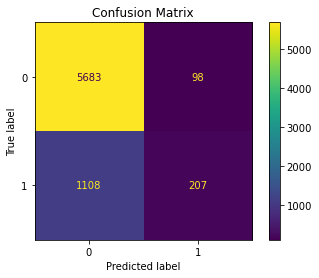


Recall score:  0.1574144486692015


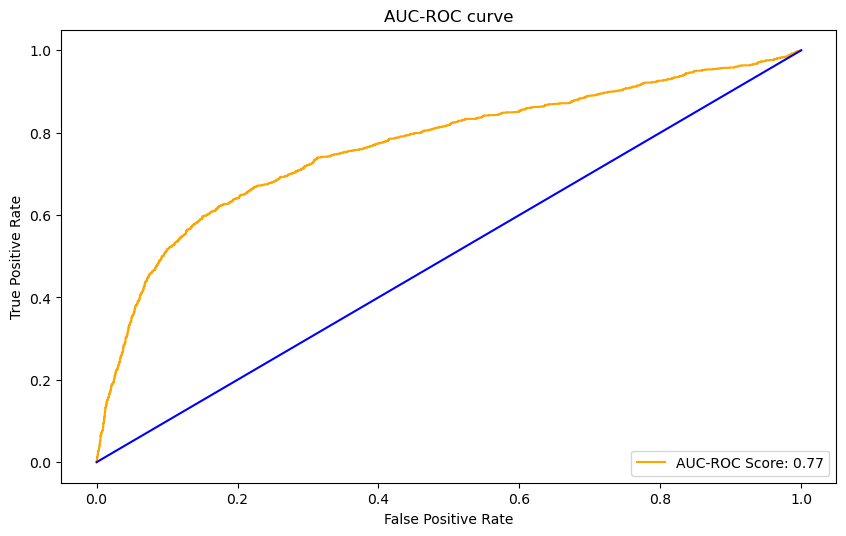

In [14]:
# Confusion matrix:
cm = confusion_matrix(test_y,predictions, labels=log_reg_model.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg_model.classes_)
cm_disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Recall Score:
print('\nRecall score: ',recall_score(test_y, predictions))

# Calculating roc-auc accuracy score for the model:
accuracy_score = roc_auc_score(test_y, pred_probabilities[:,1])

# ROC-AUC Curve:
# Creating this for the random line in the roc-auc curve:
random_probs = [0 for i in range(len(test_y))]
# Getting false positive rate and true positive rates from the roc_curve function:
fpr, tpr, thresh = roc_curve(test_y, pred_probabilities[:,1])
p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

plt.figure(figsize=(10,6), dpi=100)
plt.plot(fpr,tpr, linestyle='solid', color = 'orange', label ='AUC-ROC Score: '+ str(round(accuracy_score,2)))
plt.plot(p_fpr,p_tpr, linestyle='solid', color = 'blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC curve')
plt.legend(loc='lower right')
plt.show()

In [15]:
def Stratified_K_Fold_cross_val(classification_model, df, features, thresh = 0.5 ):
    
    if features == list(df.columns):
        # Splitting data into independent and dependent features:
        df_y = df['churn']
        df_X = df.drop('churn', axis=1) 
        # Columns that need scaling:
        cols_to_scale = ['current_balance','previous_month_end_balance', 'average_monthly_balance_prevQ',
                         'average_monthly_balance_prevQ2', 'current_month_credit',
                         'previous_month_credit', 'current_month_debit', 'previous_month_debit',
                         'current_month_balance', 'previous_month_balance']
    else:
        df_y = df['churn']
        df_X = df[features]
        cols_to_scale = features
    
    # Initializing Stratified K Fold Cross validation:
    skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=1)
    
    # Variable to track the fold number:
    fold_num = 1
    
    # Implementing Stratified K fold cross validation:
    for train_index, test_index in skf.split(df_X, df_y):
        
        # Print statement to identify which fold is currently running:
        print('\n{} fold of KFold {}'.format(fold_num,skf.n_splits))
        
        train_X_fold, test_X_fold = df_X.loc[train_index], df_X.loc[test_index]
        train_y_fold, test_y_fold = df_y.loc[train_index], df_y.loc[test_index]

        # Scaling: 
        # Performing Log transformation on independent features of both train and test folds since the columns are skewed:
        for i in cols_to_scale:
            train_X_fold[i] = np.log(train_X_fold[i] + 17000)
            test_X_fold[i] = np.log(test_X_fold[i] + 17000)
        # Initializing Standard Scaler:
        scaler = StandardScaler()
        # Applying Standard Scaler on independent features of both train and test folds:
        train_X_fold_scaled = scaler.fit_transform(train_X_fold)
        test_X_fold_scaled = scaler.transform(test_X_fold)
        
        # Model building:
        # Fitting the model:
        classification_model.fit(train_X_fold_scaled, train_y_fold)
        # Making Predictions:
        preds = classification_model.predict(test_X_fold_scaled)
        # Making Predictions in the form of probabilities:
        preds_proba = classification_model.predict_proba(test_X_fold_scaled)[:,1]
        
        # Model evaluation:
        roc_auc_accuracy = roc_auc_score(test_y_fold, preds_proba)
        precision_accuracy = precision_score(test_y_fold, preds)
        recall_accuracy = recall_score(test_y_fold, preds)
        
        # Displaying evaluation metrics:
        print('ROC-AUC Score: {:.4f}, Precision: {:.4f}, Recall: {:.4f}'.format(roc_auc_accuracy*100, precision_accuracy, recall_accuracy))
        
        # Increasing the fold number for the next iteration:
        fold_num = fold_num + 1

In [16]:
Stratified_K_Fold_cross_val(LogisticRegression(), churn_data, list(churn_data.columns), thresh = 0.5 )


1 fold of KFold 5
ROC-AUC Score: 79.7696, Precision: 0.7361, Recall: 0.2386

2 fold of KFold 5
ROC-AUC Score: 79.2875, Precision: 0.7357, Recall: 0.2329

3 fold of KFold 5
ROC-AUC Score: 80.4176, Precision: 0.7606, Recall: 0.2386

4 fold of KFold 5
ROC-AUC Score: 79.4624, Precision: 0.7194, Recall: 0.2291

5 fold of KFold 5
ROC-AUC Score: 80.4502, Precision: 0.7061, Recall: 0.2215


### Feature Selection using Recursive Feature Elimination (RFE):

In [17]:
# Initializing and fitting RFE:
rfe = RFE(estimator=log_reg_model, n_features_to_select=1, step=1)
rfe.fit(train_X, train_y)

# Creating data frame with feature names (Independent features) and their corresponding rank based on their importance:
feature_ranking = pd.DataFrame()
feature_ranking['Feature_names'] = train_X.columns
feature_ranking['rank'] = rfe.ranking_
feature_ranking = feature_ranking.sort_values(by='rank').reset_index(drop=True)
# Picking top 5 important features:
feature_ranking[feature_ranking['rank'] <= 10]

,Feature_names,rank
0,current_balance,1
1,average_monthly_balance_prevQ,2
2,occupation_company,3
3,average_monthly_balance_prevQ2,4
4,current_month_balance,5
5,previous_month_balance,6
6,current_month_debit,7
7,occupation_retired,8
8,customer_nw_category,9
9,gender_Male,10


In [18]:
# Top 10 important features:
imp_features = list(feature_ranking[feature_ranking['rank'] <= 15]['Feature_names'].values)
display(churn_data[imp_features])

# Checking Stratified K Fold cross validation scores using top 15 important features for prediction:
Stratified_K_Fold_cross_val(LogisticRegression(), churn_data, imp_features, thresh = 0.5 )

,current_balance,average_monthly_balance_prevQ,occupation_company,average_monthly_balance_prevQ2,current_month_balance,previous_month_balance,current_month_debit,occupation_retired,customer_nw_category,gender_Male,occupation_self_employed,previous_month_debit,current_month_credit,occupation_student,dependents
0,1458.71,1458.71,0,1449.07,1458.71,1458.71,0.20,0,2,1,1,0.20,0.20,0,0
1,5390.37,7799.26,0,12419.41,6496.78,8787.61,5486.27,0,2,1,1,100.56,0.56,0,0
2,3913.16,4910.17,0,2815.94,5006.28,5070.14,6046.73,0,2,1,0,259.23,0.61,0,0
3,2291.91,2084.54,0,1006.54,2291.91,1669.79,0.47,0,2,1,1,2143.33,0.47,0,0
4,927.72,1643.31,0,1871.12,1157.15,1677.16,588.62,0,3,1,1,1538.06,0.33,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,1076.43,2282.19,0,2787.70,1076.43,1076.43,0.30,0,2,0,0,0.30,0.30,1,0
28378,3844.10,3668.83,0,3865.55,3738.54,3690.32,901.00,0,2,0,1,1014.07,1.71,0,0
28379,65511.97,53444.81,0,21925.81,61078.50,57564.24,168.23,0,2,1,0,71.80,4666.84,0,0
28380,1625.55,1683.20,0,1857.42,1625.55,1625.55,0.20,0,3,1,1,0.20,0.20,0,3



1 fold of KFold 5
ROC-AUC Score: 80.0466, Precision: 0.7421, Recall: 0.2243

2 fold of KFold 5
ROC-AUC Score: 79.0182, Precision: 0.7068, Recall: 0.2177

3 fold of KFold 5
ROC-AUC Score: 80.4801, Precision: 0.7624, Recall: 0.2196

4 fold of KFold 5
ROC-AUC Score: 79.2281, Precision: 0.7143, Recall: 0.2186

5 fold of KFold 5
ROC-AUC Score: 80.2595, Precision: 0.7070, Recall: 0.2110


##### From the above evaluation metrics we can see that the recall score is very low, which means the False Negative Rate is higher. This is because of highly imbalanced target classes as shown below

In [19]:
# Imbalance Targed data:
churn_data['churn'].value_counts()/churn_data.shape[0] * 100

0    81.467127
1    18.532873
Name: churn, dtype: float64

##### Here, we can see that 81% of the target classes are 0 so, the model has a bias towards 0 and predicts 0 where the actual value is 1 (False Negative). Hence, we have low recall score (High False Negative Rate)